# Lab 02 - 15 paÅº 2023

In [12]:
# imports
import numpy as np
import pandas as pd
import random
import math
import pygad
import time

## Problem podziaÅ‚u (przypomnienie z wykÅ‚adu)

W problemie podziaÅ‚u (Parition problem) pytamy, czy da siÄ™ podzieliÄ‡ zbiÃ³r liczb S na dwa zbiory S1 i S2 w taki sposÃ³b, Å¼e liczby w jednym i drugim podzbiorze sumujÄ… siÄ™ do tej samej liczby. 
Rozpatrzmy poniÅ¼szy zbiÃ³r o 15 liczbach: S = [1, 2, 3, 6, 10, 17, 25, 29, 30, 41, 51, 60, 70, 79, 80]

## Zadanie wstÄ™pne

Przedstawiony powyÅ¼ej problem podziaÅ‚u zostaÅ‚ rozwiÄ…zany za pomocÄ… paczki pygad (co
omÃ³wiono na wykÅ‚adzie) https://pygad.readthedocs.io/en/latest/
Uruchom i przeanalizuj poniÅ¼sze rozwiÄ…zanie (zaÅ‚Ä…czone jest teÅ¼ jako osobny plik
partition_ga.py)

Parameters of the best solution: [0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0.]
Fitness value of the best solution = -0.0
Predicted output based on the best solution: 252.0


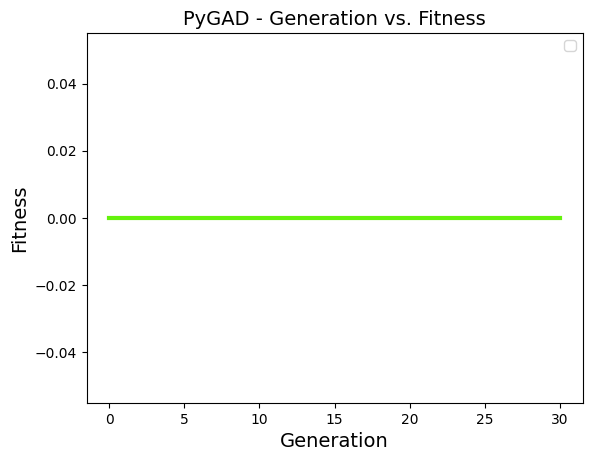

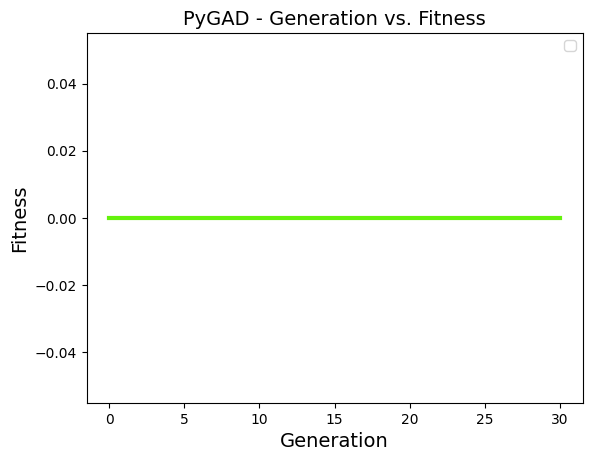

In [13]:
S = [1, 2, 3, 6, 10, 17, 25, 29, 30, 41, 51, 60, 70, 79, 80]
# definiujemy parametry chromosomu
# geny to liczby: 0 lub 1
gene_space = [0, 1]


# definiujemy funkcjÄ™ fitness
def fitness_func(ga_instance, solution, solution_idx):
    sum1 = np.sum(solution * S)
    solution_invert = 1 - solution
    sum2 = np.sum(solution_invert * S)
    fitness = -np.abs(sum1 - sum2)
    # lub: fitness = 1.0 / (1.0 + numpy.abs(sum1-sum2))
    return fitness


fitness_function = fitness_func
# ile chromsomÃ³w w populacji
# ile genow ma chromosom
sol_per_pop = 10
num_genes = len(S)
# ile wylaniamy rodzicow do "rozmanazania" (okolo 50% populacji)
# ile pokolen
# ilu rodzicow zachowac (kilka procent)
num_parents_mating = 5
num_generations = 30
keep_parents = 2
# jaki typ selekcji rodzicow?
# sss = steady, rws=roulette, rank = rankingowa, tournament = turniejowa
parent_selection_type = "sss"

# w il =u punktach robic krzyzowanie?
crossover_type = "single_point"
# mutacja ma dzialac na ilu procent genow?
# trzeba pamietac ile genow ma chromosom
mutation_type = "random"
mutation_percent_genes = 8
# inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
ga_instance = pygad.GA(
    gene_space=gene_space,
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,
    fitness_func=fitness_function,
    sol_per_pop=sol_per_pop,
    num_genes=num_genes,
    parent_selection_type=parent_selection_type,
    keep_parents=keep_parents,
    crossover_type=crossover_type,
    mutation_type=mutation_type,
    mutation_percent_genes=mutation_percent_genes,
)
# uruchomienie algorytmu
ga_instance.run()
# podsumowanie: najlepsze znalezione rozwiazanie (chromosom+ocena)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution: {solution}".format(solution=solution))
print(
    "Fitness value of the best solution = {solution_fitness}".format(
        solution_fitness=solution_fitness
    )
)
# tutaj dodatkowo wyswietlamy sume wskazana przez jedynki
prediction = np.sum(S * solution)
print(
    "Predicted output based on the best solution: {prediction}".format(
        prediction=prediction
    )
)
# wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokolen
ga_instance.plot_fitness()

## Problem plecakowy (przypomnienie z wykÅ‚adu)

W problemie plecakowym dana jest lista przedmiotÃ³w o wartoÅ›ciach i wagach. Chcemy do
plecaka zabraÄ‡ najcenniejsze rzeczy. Pytanie brzmi: jaki zestaw przedmiotÃ³w (o Å‚Ä…cznej
maksymalnej wadze n kg) ma najwiÄ™kszÄ… wartoÅ›Ä‡?

## Zadanie 1

RozwiÄ…Å¼ powyÅ¼szy problem plecakowy w Pythonie z uÅ¼yciem paczki pygad. MoÅ¼esz skorzystaÄ‡
z kodu z partition_ga.py, ktÃ³ry trzeba rozsÄ…dnie zmodyfikowaÄ‡. NajwaÅ¼niejsze jest poprawne
napisanie funkcji fitness â€“ wskazÃ³wki byÅ‚y na wykÅ‚adzie.
Dopasuj parametry algorytmu do powyÅ¼szego problemu (wielkoÅ›Ä‡ populacji, mutacja, itp.)
Jakie jest najlepsze rozwiÄ…zanie? KtÃ³re przedmioty powinniÅ›my zabraÄ‡? JakÄ… majÄ… wartoÅ›Ä‡?

In [14]:
item_number = np.arange(1, 12)
weights = np.array([7, 7, 6, 2, 5, 6, 1, 3, 10, 3, 15])
values = np.array([100, 300, 200, 40, 500, 70, 100, 250, 300, 280, 300])

knapsack_max_weight = 25

for i in range(item_number.shape[0]):
    print(
        "Przedmiot ", item_number[i], ": Waga = ", weights[i], ", WartoÅ›Ä‡ = ", values[i]
    )

Przedmiot  1 : Waga =  7 , WartoÅ›Ä‡ =  100
Przedmiot  2 : Waga =  7 , WartoÅ›Ä‡ =  300
Przedmiot  3 : Waga =  6 , WartoÅ›Ä‡ =  200
Przedmiot  4 : Waga =  2 , WartoÅ›Ä‡ =  40
Przedmiot  5 : Waga =  5 , WartoÅ›Ä‡ =  500
Przedmiot  6 : Waga =  6 , WartoÅ›Ä‡ =  70
Przedmiot  7 : Waga =  1 , WartoÅ›Ä‡ =  100
Przedmiot  8 : Waga =  3 , WartoÅ›Ä‡ =  250
Przedmiot  9 : Waga =  10 , WartoÅ›Ä‡ =  300
Przedmiot  10 : Waga =  3 , WartoÅ›Ä‡ =  280
Przedmiot  11 : Waga =  15 , WartoÅ›Ä‡ =  300


In [15]:
def fitness_func(ga_instance, solution, solution_idx):
    weight_sum = np.sum(solution * weights)
    value_sum = np.sum(solution * values)
    if weight_sum <= knapsack_max_weight:
        fitness = value_sum
    else:
        fitness = 0
    return fitness

In [16]:
ga_instance = pygad.GA(
    gene_type=int,
    gene_space=[0, 1],
    num_generations=100,
    num_parents_mating=4,
    fitness_func=fitness_func,
    keep_parents=2,
    sol_per_pop=10,
    num_genes=len(item_number),
    mutation_percent_genes=2,
    mutation_type="random",
    parent_selection_type="sss",
)

Najlepsze rozwiÄ…zanie:  (array([0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0]), 1630, 0)
Wybrany przedmiot # 1
Wybrany przedmiot # 2
Wybrany przedmiot # 4
Wybrany przedmiot # 6
Wybrany przedmiot # 7
Wybrany przedmiot # 9
CaÅ‚kowita wartoÅ›Ä‡ przedmiotÃ³w:  1630


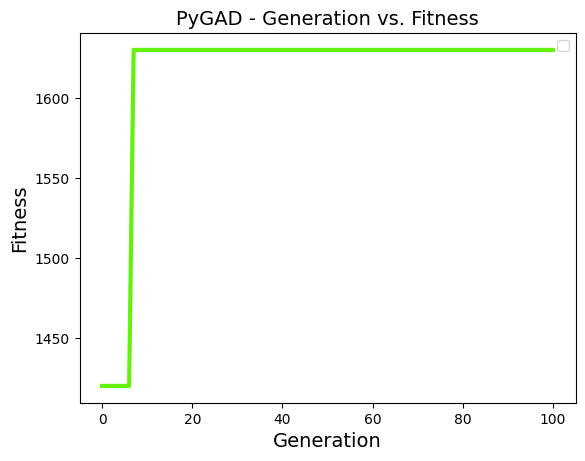

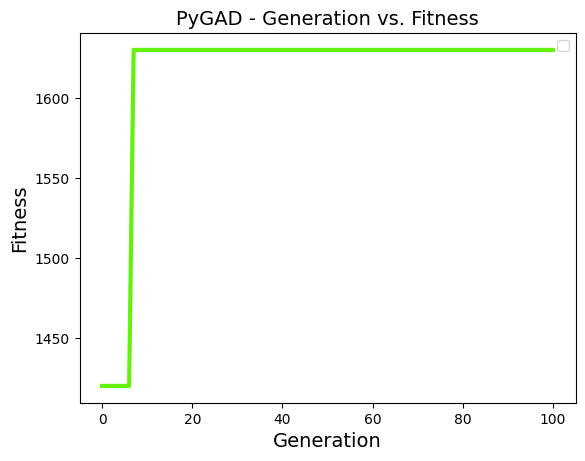

In [17]:
ga_instance.run()
print("Najlepsze rozwiÄ…zanie: ", ga_instance.best_solution())
# Items to pick
for selected_item in range(len(item_number)):
    if ga_instance.best_solution()[0][selected_item] == 1:
        print("Wybrany przedmiot #", selected_item)
# Total value
print("CaÅ‚kowita wartoÅ›Ä‡ przedmiotÃ³w: ", ga_instance.best_solution()[1])
ga_instance.plot_fitness()

## Zadanie 2

Zapoznaj siÄ™ z moÅ¼liwoÅ›ciÄ… dodania warunkÃ³w zatrzymania dla algorytmu genetycznego w
pygad:
https://pygad.readthedocs.io/en/latest/README_pygad_ReadTheDocs.html#stop-criteria
Dla zadania 1, zmodyfikuj kod programu tak, aby:
a) Program tworzyÅ‚ nowe pokolenia dopÃ³ki nie znajdzie rozwiÄ…zania z fitness rÃ³wnym
1600. Gdy fitness 1600 zostanie osiÄ…gniÄ™te, to algorytm przerwie dziaÅ‚anie.
b) Po zakoÅ„czeniu program wypisze, ile pokoleÅ„ minÄ™Å‚o, aÅ¼ do znalezienia najlepszego
rozwiÄ…zania.
c) Zmierz, ile czasu dziaÅ‚aÅ‚ algorytm genetyczny. Przed i po poleceniach:
ga_instance = pygad.GA(...)
ga_instance.run()
trzeba zmierzyÄ‡ czas systemowy i podaÄ‡ rÃ³Å¼nicÄ™ czasu.
PrzykÅ‚ad z Internetu:
import time
start = time.time()
print("hello")
end = time.time()
print(end - start)
d) Zmierz czas 10 razy, zapisz wszystkie wyniki i podaj Å›redniÄ… z wynikÃ³w. Ile Å›rednio
czasu zajmuje algorytmowi genetycznemu znalezienie rozwiÄ…zania?

Czas:  0.002997159957885742
RozwiÄ…zanie optymalne:  (array([0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0]), 1630, 3)
Generacja = 7


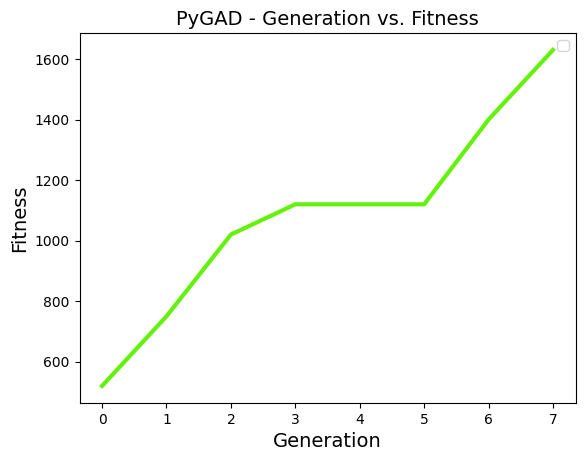

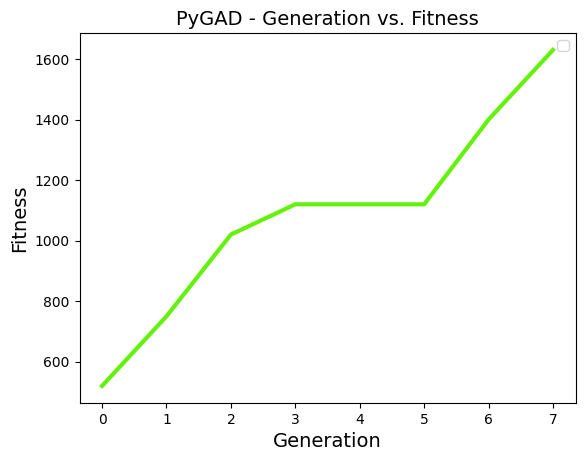

In [18]:
start_time = time.time()
ga_instance = pygad.GA(
    gene_type=int,
    gene_space=[0, 1],
    num_generations=999,
    num_parents_mating=4,
    fitness_func=fitness_func,
    keep_parents=2,
    sol_per_pop=10,
    stop_criteria="reach_1600",
    num_genes=len(item_number),
    mutation_percent_genes=2,
)

ga_instance.run()
end_time = time.time()

print("Czas: ", end_time - start_time)
print("RozwiÄ…zanie optymalne: ", ga_instance.best_solution())
print("Generacja = {generation}".format(generation=ga_instance.generations_completed))
ga_instance.plot_fitness()

## Problem inÅ¼ynieryjny: stop metali

W pewnym zakÅ‚adzie badawczym inÅ¼ynierowie prÃ³bowali stworzyÄ‡ bardzo trwaÅ‚y stop szeÅ›ciu
metali. IloÅ›ci wszystkich 6 metali w stopie oznaczone zostaÅ‚y symbolami x, y, z, u, v, w i sÄ… to
liczby z przedziaÅ‚u [0, 1). OkazaÅ‚o siÄ™, Å¼e wytrzymaÅ‚oÅ›Ä‡ stopu okreÅ›lona jest przez funkcjÄ™:
endurance(x, y, z, v, u, w) = e^âˆ’2âˆ™(yâˆ’sin (x))^2+ sin(z âˆ™ u) + cos (v âˆ™ w)
Obliczenie maksymalnej wytrzymaÅ‚oÅ›ci (endurance) byÅ‚o dla inÅ¼ynierÃ³w problematyczne.
Poproszono Ciebie, eksperta od sztucznej inteligencji, o rozwiÄ…zanie problemu.

## Zadanie 3

W tym zadaniu rozwiÄ…Å¼emy problem inÅ¼ynieryjny za pomocÄ… algorytmu genetycznego.
Naszym celem jest znalezienie odpowiedzi na dwa pytania:
â€¢ Jaka jest najlepsza wytrzymaÅ‚oÅ›Ä‡ stopu metali?
â€¢ Jakie iloÅ›ci metali trzeba zmieszaÄ‡, by uzyskaÄ‡ najbardziej wytrzymaÅ‚y stop?

Przydatny fragment kodu (po imporcie biblioteki math):
def endurance(x, y, z, u, v, w):
return math.exp(-2*(y-math.sin(x))**2)+math.sin(z*u)+math.cos(v*w)

Zadanie to jest inne niÅ¼ te z poprzednich laboratoriÃ³w, gdyÅ¼ musimy siÄ™ zmierzyÄ‡ z
chromosomami, ktÃ³re nie majÄ… zer i jedynek jak genÃ³w. Zamiast nich, majÄ… liczby rzeczywiste
(zmiennoprzecinkowe) z przedziaÅ‚u [0, 1).

PrzykÅ‚adowy chromosom: A = [0.09, 0.06, 0.99, 0.98, 0.1, 0.15]

RozwiÄ…Å¼ ten problem z uÅ¼yciem paczki pygad i odpowiedz na pytania zadane na poczÄ…tku tego
zadania.
a) OtwÃ³rz dokumentacjÄ™ i korzystaj z niej w razie problemÃ³w:
https://pygad.readthedocs.io/en/latest/README_pygad_ReadTheDocs.html
b) Zdefiniuj poprawnie gene_space.
c) Zdefiniuj sensownÄ… funkcjÄ™ fitness (to jest u nas banalnie proste ðŸ˜‰)
d) Ustaw sensowne parametry zwiÄ…zane z populacjÄ… i dÅ‚ugoÅ›ciÄ… chromosomu (6!).
e) Chromosom jest krÃ³tki, mutacjÄ™ trzeba zwiÄ™kszyÄ‡ do kilkunastu procent, Å¼eby nie
dostawaÄ‡ czerwonego warninga.
UserWarning: The percentage of genes to mutate ...
f) Uruchom algorytm genetyczny. PowtÃ³rz kilka razy, by zobaczyÄ‡ czy wyniki i wykresy siÄ™
zmieniajÄ….

Parameters of the best solution: [ 0.29319985  0.28267742  1.60026102  0.97454955  0.01627348 -1.40553626]
Fitness value of the best solution = 2.999594624870235


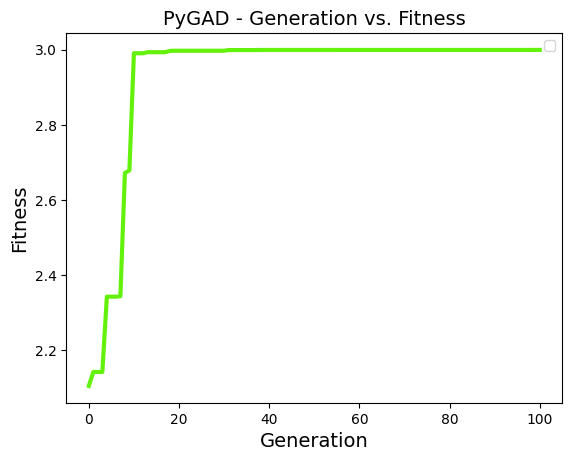

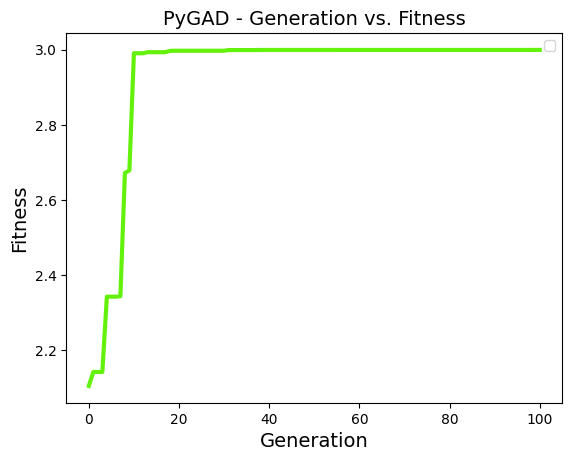

In [23]:
def endurance(x, y, z, u, v, w):
    return math.exp(-2 * (y - math.sin(x)) ** 2) + math.sin(z * u) + math.cos(v * w)